## santoshhulbutti@gmail.com   |   Flip Robo Technologies   |   Project Internship #31

## Project #4: Data Scaping for Used Car Price prediction Project

In [1]:
#importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from tqdm import tqdm

import os
import urllib
import re

import selenium
from selenium import webdriver
from selenium.common.exceptions import StaleElementReferenceException, NoSuchElementException, ElementNotInteractableException
from selenium.webdriver.common.by import By
import time

from bs4 import BeautifulSoup as bs
import requests

import warnings
warnings.filterwarnings('ignore')

In [2]:
#creating empty list to store the data
all_url = []


brand = []
model = []
variant = []


registration_year = []
km_driven = []
primary_fuel = []
transmission = []


owner_comment = []
is_hybrid = []
ever_damaged = []


prices = []
car_price = []
price_unit = []
color = []
owner_type = []
registration_city = []
insurance_type = []
reg_type = []


engine_cap = []
cylinders = []
engine_type = []
max_power = []
max_p_rpm = []
max_torque = []
max_t_rpm = []
mileage = []
drive_type = []
turbocharger = []


length = []
car_segment = []
ground_clear = []


seating_capacity = []
bootspace = []
fuel_tank_cap = []


front_brake_type = []
rear_brake_type = []
min_turn_rad = []
steering_type = []
wheels = []
front_tyres = []
rear_tyres = []


airbags = []
window_slide_type = []

In [7]:
# read text file into pandas DataFrame
df = pd.read_csv("data/location.txt", header=None, names=["Location"])
# display DataFrame
locations = df['Location'].tolist()
locations

['Delhi',
 'Mumbai',
 'Kolkata',
 'Bangaluru',
 'Chennai',
 'Hyderabad',
 'Pune',
 'Ahmedabad',
 'Surat',
 'Jaipur',
 'Kozhikode',
 'Kochi',
 'Kanpur',
 'Nagpur',
 'Coimbatore',
 'Lucknow',
 'Indore',
 'Patna',
 'Bhopal',
 'Vadodara',
 'Visakhapatnam',
 'Nashik',
 'Chandigarh',
 'Allahabad',
 'Vijaywada',
 'Manglore',
 'Goa',
 'Mysore',
 'Amritsar',
 'Mohali']

In [8]:
for location in tqdm(locations):
    #connecting to google chrome web driver
    options = webdriver.ChromeOptions()
    options.add_argument("--start-maximized")
    options.add_argument("disable-popup-blocking")
    driver = webdriver.Chrome(r'chromedriver.exe', chrome_options=options)
    # getting the webpage
    driver.get('https://www.carwale.com/used/cars-for-sale/')

    #waiting to load the web page
    time.sleep(0.5)
    
    driver.find_element(By.XPATH, '//*[@id="placesQuery"]').send_keys(location)
    time.sleep(1.5)
    driver.find_element(By.XPATH, '/html/body/ul[2]').click()
    
    for i in range(70):
        driver.execute_script("window.scrollBy(0,1500)")
    url = []    
    urls = driver.find_elements(By.XPATH,'//a[@class="car-item__image-link js-interactive-tracking"]')
    for i in urls:
        url.append(i.get_attribute('href'))
    all_url = all_url+url
    driver.close()

100%|██████████████████████████████████████████████████████████████████████████████████████████████████| 30/30 [16:55<00:00, 33.86s/it]


In [3]:
# all_cars_url = pd.Series(all_url, name = 'Links')
# all_cars_url.to_csv('data/all_cars_url3.csv')
all_url = pd.read_csv('data/all_cars_url3.csv')
all_url.drop('Unnamed: 0',axis=1,inplace=True)
all_url = all_url['Links'].tolist()
print(len(all_url))

6046


In [4]:
for ur in tqdm(all_url):
    options = webdriver.ChromeOptions()
    options.add_argument("--start-maximized")
    options.add_argument("disable-popup-blocking")
    driver = webdriver.Chrome(r'chromedriver.exe', chrome_options=options)
    driver.get(ur)
    time.sleep(1)

    textss = driver.find_elements(By.XPATH,'//div[@class="breadcrumb margin-bottom15"]')
    basic_details = driver.find_elements(By.XPATH,'//div[@class="content-inner-block-10 border-solid-left border-solid-right border-solid-bottom bg-white"]')
    try:
        overview_list = driver.find_element(By.XPATH, '//div[@class="overview-list padding-bottom10"]').text.split('\n')
    except NoSuchElementException:
        continue
    try:
        driver.find_element(By.XPATH, '//div[@class="content-box-shadow margin-bottom20"]/div[1]/div[1]/ul/li[3]').click()
        time.sleep(0.5)
        feat_list = driver.find_element(By.XPATH, '//div[@class="description description-features-0 show"]').text.split('\n')
    except:
        feat_list = [None, None]

    time.sleep(0.5)
    driver.find_element(By.XPATH, '//div[@class="content-box-shadow margin-bottom20"]/div[1]/div[1]/ul/li[2]').click()
    driver.find_element(By.XPATH, '//div[@class="cw-tabs-data hide overviewConatiner"]/div/ul/li[2]/div/div').click()
    driver.find_element(By.XPATH, '//div[@class="cw-tabs-data hide overviewConatiner"]/div/ul/li[3]/div/div').click()
    driver.find_element(By.XPATH, '//div[@class="cw-tabs-data hide overviewConatiner"]/div/ul/li[4]/div/div').click()
    time.sleep(0.5)
    specs_1_list = driver.find_element(By.XPATH, '//div[@class="description description-specifications-0 show"]').text.split('\n')
    specs_2_list = driver.find_element(By.XPATH, '//div[@class="description description-specifications-1 show"]').text.split('\n')
    specs_3_list = driver.find_element(By.XPATH, '//div[@class="description description-specifications-2 show"]').text.split('\n')
    specs_4_list = driver.find_element(By.XPATH, '//div[@class="description description-specifications-3 show"]').text.split('\n')

    item1 = iter(overview_list)
    item2 = iter(specs_1_list)
    item3 = iter(specs_2_list)
    item4 = iter(specs_3_list)
    item5 = iter(specs_4_list)
    item6 = iter(feat_list)

    ov_dict = dict(zip(item1, item1))
    spec1_dict = dict(zip(item2, item2))
    spec2_dict = dict(zip(item3, item3))
    spec3_dict = dict(zip(item4, item4))
    spec4_dict = dict(zip(item5, item5))
    feat_dict = dict(zip(item6, item6))


    try:
        ##Brand name
        brand.append(textss[0].text.split(' ')[3])
    except:
        brand.append(np.nan)

    try:
        ##model name
        model.append(textss[0].text.split(' ')[4])
    except:
        model.append(np.nan)

    try:
        ##variant name
        variant.append(' '.join(textss[0].text.split(' ')[5:]))
    except:
        variant.append(np.nan)        

    try:
        ## Registration year
        registration_year.append(basic_details[0].text.split('\n')[0])
    except:
        registration_year.append(np.nan)

    try:
        ## km driven
        km_driven.append(basic_details[0].text.split('\n')[1])
    except:
        km_driven.append(np.nan)

    try:
        ## fuel
        primary_fuel.append(basic_details[0].text.split('\n')[2])
    except:
        primary_fuel.append(np.nan)

    try:
        ## transmission
        transmission.append(basic_details[0].text.split('\n')[3])
    except:
        transmission.append(np.nan)

    try:
        ## Registration city
        registration_city.append(basic_details[0].text.split('\n')[4])
    except:
        registration_city.append(np.nan)

    try:
        ##owners comment
        owner_comment.append(driver.find_element(By.XPATH, '//div[@class="content-box-shadow content-inner-block-10 font14"]').text)
    except NoSuchElementException:
        owner_comment.append(np.nan)

    try:
        car_price.append(float(ov_dict.get('Price').split(' ')[1]))
        price_unit.append(ov_dict.get('Price').split(' ')[2])
    except:
        car_price.append((ov_dict.get('Price').split(' ')[1]))
        price_unit.append(np.nan)            

    color.append(ov_dict.get('Color'))
    owner_type.append(ov_dict.get('No. of Owner(s)'))
    insurance_type.append(ov_dict.get('Insurance'))
    reg_type.append(ov_dict.get('Registration type'))

    try:
        engine_cap.append(float(spec1_dict.get('Engine').split(',')[0][:-3]))
    except:
        engine_cap.append(np.nan)

    try:
        cylinders.append(int(spec1_dict.get('Engine').split(',')[1].strip().split(' ')[0]))
    except:
        cylinders.append(np.nan)

    engine_type.append(spec1_dict.get('Engine Type'))

    try:
        max_power.append(float(spec1_dict.get('Max Power (bhp@rpm)').split(' ')[0]))
    except:
        max_power.append(np.nan)

    try:
        max_p_rpm.append(int(spec1_dict.get('Max Power (bhp@rpm)').split(' ')[3]))
    except:
        max_p_rpm.append(np.nan)

    try:
        max_torque.append(float(spec1_dict.get('Max Torque (Nm@rpm)').split(' ')[0]))
    except:
        max_torque.append(np.nan)

    try:
        max_t_rpm.append(int(spec1_dict.get('Max Torque (Nm@rpm)').split(' ')[3]))
    except:
        max_t_rpm.append(np.nan)

    try:
        mileage.append(float(spec1_dict.get('Mileage (ARAI)').split(' ')[0]))
    except:
        mileage.append(np.nan)


    drive_type.append(spec1_dict.get('Drivetrain'))
    turbocharger.append(spec1_dict.get('Turbocharger/Supercharger'))


    try:
        car_length = int(spec2_dict.get('Length').split(' ')[0])
        length.append(car_length)
        if car_length <= 3400:
            car_segment.append('A1')
        elif car_length <= 4000:
            car_segment.append('A2')
        elif car_length <= 4500:
            car_segment.append('A3')
        elif car_length <= 4700:
            car_segment.append('A4')
        elif car_length <= 5000:
            car_segment.append('A5')
        elif car_length > 5000:
            car_segment.append('A6')
    except:
        length.append(np.nan)
        car_segment.append(np.nan)

    try:
        ground_clear.append(spec2_dict.get('Ground Clearance').split(' ')[0])
    except:
        ground_clear.append(np.nan)

    driver.close()

 73%|█████████████████████████████████████████████████████████████████▎                       | 4439/6046 [12:52:05<4:39:30, 10.44s/it]


ElementNotInteractableException: Message: element not interactable
  (Session info: chrome=107.0.5304.107)
Stacktrace:
Backtrace:
	Ordinal0 [0x004FACD3+2075859]
	Ordinal0 [0x0048EE61+1633889]
	Ordinal0 [0x0038B680+571008]
	Ordinal0 [0x003BBBD6+768982]
	Ordinal0 [0x003B1C76+728182]
	Ordinal0 [0x003D731C+881436]
	Ordinal0 [0x003B15BF+726463]
	Ordinal0 [0x003D7534+881972]
	Ordinal0 [0x003EB56A+963946]
	Ordinal0 [0x003D7136+880950]
	Ordinal0 [0x003AFEFD+720637]
	Ordinal0 [0x003B0F3F+724799]
	GetHandleVerifier [0x007AEED2+2769538]
	GetHandleVerifier [0x007A0D95+2711877]
	GetHandleVerifier [0x0058A03A+521194]
	GetHandleVerifier [0x00588DA0+516432]
	Ordinal0 [0x0049682C+1665068]
	Ordinal0 [0x0049B128+1683752]
	Ordinal0 [0x0049B215+1683989]
	Ordinal0 [0x004A6484+1729668]
	BaseThreadInitThunk [0x76BE7BA9+25]
	RtlInitializeExceptionChain [0x77D8BB9B+107]
	RtlClearBits [0x77D8BB1F+191]


In [5]:
for i in [brand,model,variant,registration_year,km_driven,primary_fuel,transmission,
          registration_city,owner_comment,car_price,price_unit,color,owner_type,
          insurance_type,reg_type,engine_cap,cylinders,engine_type,max_power,max_p_rpm,
          max_torque,max_t_rpm,mileage,drive_type,turbocharger,length,car_segment,ground_clear]:
    print(len(i))

4060
4060
4060
4060
4060
4060
4060
4060
4060
4060
4060
4060
4060
4060
4060
4060
4060
4060
4060
4060
4060
4060
4060
4060
4060
4060
4060
4060


In [6]:
used_car_data = pd.DataFrame(list(zip(brand,model,variant,registration_year,km_driven,primary_fuel,transmission,
                                      registration_city,owner_comment,car_price,price_unit,color,owner_type,
                                      insurance_type,reg_type,engine_cap,cylinders,engine_type,max_power,max_p_rpm,
                                      max_torque,max_t_rpm,mileage,drive_type,turbocharger,length,car_segment,ground_clear)),
                              columns =['brand','model','variant','registration_year','km_driven','primary_fuel','transmission',
                                        'registration_city','owner_comment','car_price','price_unit','color','owner_type',
                                        'insurance_type','reg_type','engine_cap','cylinders','engine_type','max_power','max_p_rpm',
                                        'max_torque','max_t_rpm','mileage','drive_type','turbocharger','car_length','car_segment','ground_clear'])

used_car_data.to_csv('data/all_cars_data_fin.csv')

In [7]:
used_car_data

,brand,model,variant,registration_year,km_driven,primary_fuel,transmission,registration_city,owner_comment,car_price,...,max_power,max_p_rpm,max_torque,max_t_rpm,mileage,drive_type,turbocharger,car_length,car_segment,ground_clear
0,Maruti,Suzuki,Swift DZire LXI (O),Jun 2015,"55,000",Petrol,Manual,Noida,"Excellent condition,Well mentioned,Non acciden...",4.25,...,83.0,6000.0,115.0,4000.0,20.85,FWD,No,3995.0,A2,170
1,Renault,Kiger,RXZ AMT,Jun 2022,"1,080",Petrol,Automatic,Delhi,loan facilities available,9.1,...,71.0,6250.0,96.0,3500.0,19.03,FWD,No,3991.0,A2,205
2,Hyundai,Grand,i10 Sportz (O) 1.2 Kappa VTVT [2017-2018],May 2017,"35,018",Petrol,Manual,Delhi,"Immaculate Condition, Certified Car, Less Driv...",4.85,...,81.0,6000.0,114.0,4000.0,19.77,FWD,No,3765.0,A2,165
3,Hyundai,Elite,i20 Magna 1.2 [2016-2017],Oct 2017,"45,876",Petrol,Manual,Delhi,"Immaculate Condition, Single Owner, Non Accide...",5.2,...,82.0,6000.0,115.0,4000.0,18.60,FWD,No,3985.0,A2,170
4,Honda,City,V,Aug 2015,"49,769",Petrol,Manual,Delhi,"Good Condition, Certified Car, Non Accidental,...",5.95,...,117.0,6600.0,145.0,4600.0,17.80,FWD,No,4440.0,A3,165
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4055,Hyundai,Xcent,S 1.2 Special Edition,Jun 2015,"74,232",Petrol,Manual,Nashik,"Good Condition, Certified Car, Less Driven, No...",4.9,...,81.0,6000.0,114.0,4000.0,19.10,FWD,No,3995.0,A2,165
4056,Skoda,Superb,Elegance TSI MT,Jun 2015,"69,270",Petrol,Manual,Nashik,"Excellent Condition, Certified Car, Less Drive...",9.5,...,158.0,4500.0,250.0,1500.0,13.70,FWD,Turbocharged,4833.0,A5,159
4057,Hyundai,Grand,i10 Magna 1.2 Kappa VTVT [2013-2016],Jun 2014,"41,869",Petrol,Manual,Nashik,"Excellent Condition, Certified Car, Less Drive...",4.25,...,81.0,6000.0,114.0,4000.0,18.90,FWD,No,3765.0,A2,165
4058,Volkswagen,Vento,Highline Diesel,Jun 2014,"75,547",Diesel,Manual,Nashik,"Excellent Condition, Certified Car, Less Drive...",5.5,...,103.0,4400.0,250.0,1500.0,20.50,FWD,None,4384.0,A3,168


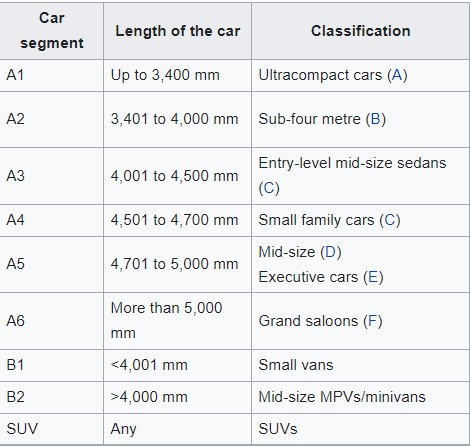